In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import Ellipse, Point, Line

e = Ellipse(Point(0, 0), 5, 10)

tan_slope = lambda x,y: -4*x/y
perp_slope = lambda x,y: y/(4*x)

def other_p_on_line(m,x,y):
    return (1, m*(1-x)+y)

slope = lambda p1x,p1y, p2x,p2y: (p2y-p1y)/(p2x-p1x)

In [2]:
print slope(0,10.1,1.4,-9.6)
print other_p_on_line(-14.0714285714, 0,10.1)

intersection = e.intersection(Line(Point(0,10.1), Point(1,-3.9714285714000006)))

print intersection[0].evalf()
print intersection[1].evalf()

print np.array(intersection[0].evalf()).astype(np.float64)
print np.array(intersection[1].evalf()).astype(np.float64)


p1, p2, p3 = Point(0, 0), Point(1, 1), Point(7, 7)
l1 = Line(p1, p2)
print l1.intersection(p3)

-14.0714285714
(1, -3.9714285714000006)
Point2D(0.00710731694998034, 9.99998989720405)
Point2D(1.40000000000273, -9.59999999999841)
[  7.10731695e-03   9.99998990e+00]
[ 1.4 -9.6]
[Point2D(7, 7)]


In [3]:
old_pt = Point([0,10.1])
bounce_pt = Point([1.4,-9.6])

m_tan = tan_slope(1.4,-9.6)
m_perp = perp_slope(1.4,-9.6)

A = Line(old_pt, other_p_on_line(m_tan, *old_pt))

B = Line(bounce_pt, other_p_on_line(m_perp, *bounce_pt))

temp = A.intersection(B)

print temp[0].evalf()
print old_pt.evalf()

new = np.array(old_pt.evalf()).astype(np.float64) - 2 * np.array(temp[0].evalf()).astype(np.float64)
print new

Point2D(-7.52953367875648, 5.70777202072539)
Point2D(0, 10.1)
[ 15.05906736  -1.31554404]


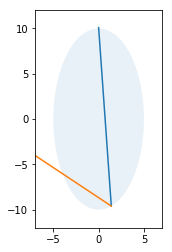

In [4]:
%matplotlib inline
from matplotlib.patches import Ellipse

ells = Ellipse((0, 0), 10, 20, 0)

a = plt.subplot(111, aspect='equal')

ells.set_clip_box(a.bbox)
ells.set_alpha(0.1)
a.add_artist(ells)
    
plt.xlim(-7,7)
plt.ylim(-12,12)

plt.plot(*zip(old_pt,bounce_pt))
plt.plot(*zip(bounce_pt, - new))

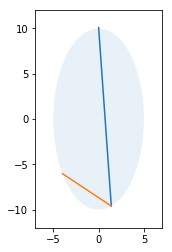

In [5]:
temp_bounce_pt = e.intersection(Line(Point(bounce_pt), Point(-new)))
temp_bounce_pt = temp_bounce_pt[0].evalf()

ells = Ellipse((0, 0), 10, 20, 0)

a = plt.subplot(111, aspect='equal')

ells.set_clip_box(a.bbox)
ells.set_alpha(0.1)
a.add_artist(ells)
    
plt.xlim(-7,7)
plt.ylim(-12,12)

plt.plot(*zip(old_pt,bounce_pt))
# plt.plot(*zip(bounce_pt, - new))
plt.plot(*zip(bounce_pt, temp_bounce_pt))

In [6]:
old_pt = Point([0,10.1])
bounce_pt = Point([1.4,-9.6])

m_tan = tan_slope(1.4,-9.6)
m_perp = perp_slope(1.4,-9.6)

A = Line(old_pt, other_p_on_line(m_tan, *old_pt))

B = Line(bounce_pt, other_p_on_line(m_perp, *bounce_pt))

temp = A.intersection(B)

print temp[0].evalf()
print old_pt.evalf()

new = np.array(old_pt.evalf()).astype(np.float64) - 2 * np.array(temp[0].evalf()).astype(np.float64)
print new

temp_bounce_pt = e.intersection(Line(Point(bounce_pt), Point(-new)))
temp_bounce_pt = temp_bounce_pt[0].evalf()

print temp_bounce_pt

Point2D(-7.52953367875648, 5.70777202072539)
Point2D(0, 10.1)
[ 15.05906736  -1.31554404]
Point2D(-3.99059761936162, -6.02499149886382)


354 this is the right amount


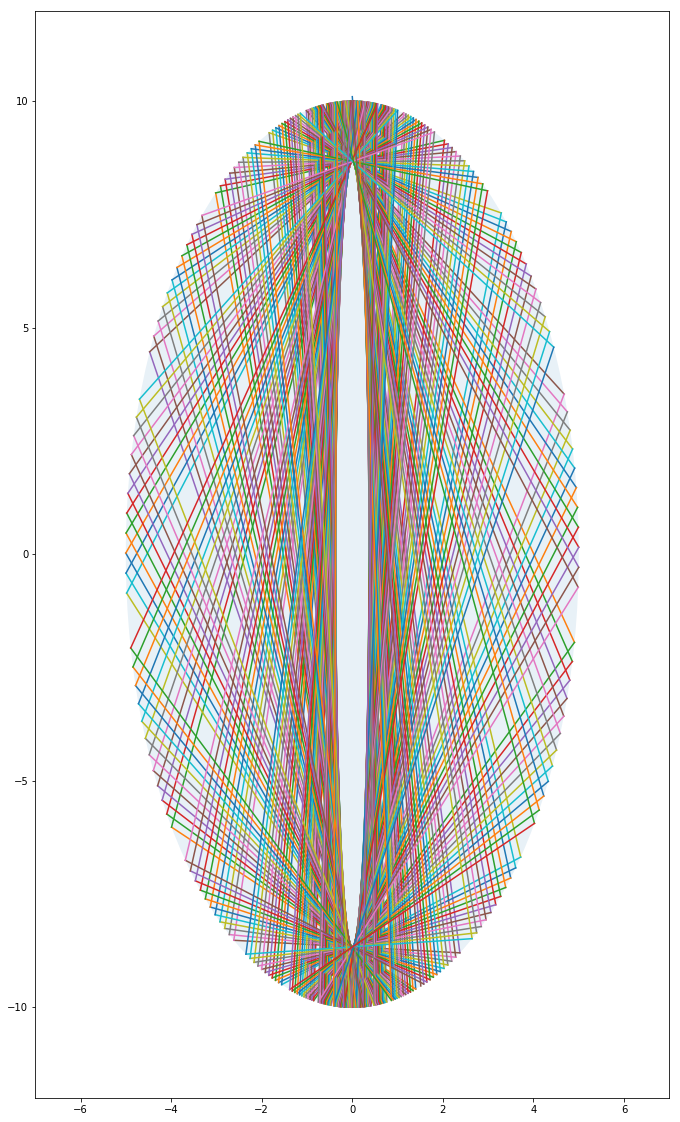

In [7]:


old_pt = Point([0,10.1])
bounce_pt = Point([1.4,-9.6])

m_tan = tan_slope(1.4,-9.6)
m_perp = perp_slope(1.4,-9.6)

ells = Ellipse((0, 0), 10, 20, 0)

plt.figure(figsize=(20,20))
a = plt.subplot(111, aspect='equal')

ells.set_clip_box(a.bbox)
ells.set_alpha(0.1)
a.add_artist(ells)
    
plt.xlim(-7,7)
plt.ylim(-12,12)

plt.plot(*zip(old_pt,bounce_pt))

counter = 0

for _ in range(1000):
#     print counter
    
    if old_pt[0] <= 0.01 and old_pt[0] >= -0.01 and counter >3 and old_pt[1] > 0:
        print counter - 1, 'this is the right amount'
        break
    
    A = Line(old_pt, other_p_on_line(m_tan, *old_pt))
    B = Line(bounce_pt, other_p_on_line(m_perp, *bounce_pt))

    temp = A.intersection(B)

    new = np.array(old_pt.evalf()).astype(np.float64) - 2 * np.array(temp[0].evalf()).astype(np.float64)

    temp_bounce_pt = e.intersection(Line(Point(bounce_pt), Point(-new)))
    
    temp0diff = abs(temp_bounce_pt[0].evalf() - bounce_pt)
    temp1diff = abs(temp_bounce_pt[1].evalf() - bounce_pt)
    
    if temp0diff > 0.01:
        temp_bounce_pt = temp_bounce_pt[0].evalf()
    else:
        temp_bounce_pt = temp_bounce_pt[1].evalf()


    
    old_pt = bounce_pt
    bounce_pt = temp_bounce_pt
    m_tan = tan_slope(*bounce_pt)
    m_perp = perp_slope(*bounce_pt)
    
    plt.plot(*zip(old_pt,bounce_pt))
    counter += 1
    
plt.show()